</div> <div class="alert alert-block alert-danger">
 <p class ="lead"> 
 <h1>Examen 2 </h1>
 <h2>Física Computacional</h2>
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Julia_Programming_Language_Logo.svg/1200px-Julia_Programming_Language_Logo.svg.png" style="height:42px;display:inline">


> Autor: Celeste Castro Granados $\mathbb C \hat{e}l \mathbb s$

In [2]:
using Plots
using LaTeXStrings
using DataFrames

# 1. Se tiene un oscilador armónico en dos dimensiones $(xy)$ en el que la fuerza está dada por $\vec F = −k \vec r$ y se tiene una fricción $\vec f_{fric} = − \gamma \vec v$ si $|\vec v| \leq 1$, pero cuando $|\vec v| > 1$ la fricción es $ \vec f_{fric} = − \mu v^{3/2} \hat v$. Si $m = 1$, $k = 1$, $\gamma = 0.1$ y $\mu = 0.2$, resuelva los siguientes ejercicios:


## a) Encuentre las ecuaciones de movimiento en coordenadas cartesianas. No es necesario resolver las ecuaciones. 

La fuerza total está dada por:

$$ \vec F_{total} = \vec F + f_{fric} = - k \vec r + f_{fric} $$

$$ \Rightarrow m \vec a = - k \vec r + f_{fric} $$ 

$$ \Rightarrow \dot{\vec v} = \bigg ( \frac{-k}{m} \bigg ) \vec r + f_{fric} \bigg ( \frac{1}{m} \bigg ) $$

Pero como $k=m=1$, entonces:

$$ \dot{\vec v} = - \vec r  + f_{fric} $$

Luego, tenemos dos casos: 

1. Si $| \vec v | \leq 1: \quad \dot{\vec v} = - \vec r  - \gamma \vec v = - \vec r -0.1 \vec v $

2. Si $| \vec v| > 1: \quad \dot{\vec v} = - \vec r  - \mu | \dot{\vec r} |^{3/2} \hat v = - \vec r -0.2 | \vec v |^{3/2} \frac{\vec v}{|\vec v|} = - \vec r -0.2 |\vec v|^{1/2} \vec v$ 

Por lo tanto, las ecuaciones de movimiento en coordenadas cartesianas son: 

$$ \begin{equation}
\left \{
\begin{array}{l} 
\dot{\vec v} = - \vec r -0.1 \vec v \quad ; | \vec v | \leq 1 \\
\dot{\vec v} = - \vec r -0.2 |\vec v|^{1/2} \vec v \quad ; | \vec v | > 1 
\end{array}
\right. 
\end{equation}$$

Por último, vamos a reescribir estas ecuaciones pero en términos de las coordenadas x, y para facilitar el proceso de programarlas:

$$ \begin{equation}
\left \{
\begin{array}{l} 
\dot{\vec v} (x,y) = - \vec r(x,y) -0.1 \vec v(x,y) \quad ; | \vec v(x,y) | \leq 1 \\
\dot{\vec v} (x,y) = - \vec r(x,y) -0.2 (v_x^2 + v_y^2)^{1/4} \vec v(x,y) \quad ; |\vec v (x,y)| > 1 
\end{array}
\right. 
\end{equation}$$

Es decir:

$$ \begin{equation}
\text{Si} \quad | \dot{\vec r} | \leq 1: \left \{
\begin{array}{l} 
\dot{v_x}  = - x -0.1  v_x \\
\dot{v_y}  = - y -0.1  v_y 
\end{array}
\right. 
\end{equation}$$

$$ \begin{equation}
\text{Si} \quad | \dot{\vec r} | > 1: \left \{
\begin{array}{l} 
\dot{ v_x} = - x -0.2 (v_x^2 + v_y^2)^{1/4}  v_x \\
\dot{ v_y} = - y -0.2 (v_x^2 + v_y^2)^{1/4}  v_y
\end{array}
\right. 
\end{equation}$$

A continuación procedemos a programar estas ecuaciones:


In [ ]:
function oscilador(r_v,t)
    #r_v=(x,vx,y,vy)
    #definimos la norma de v para poder establecer los dos casos
    v = sqrt(r_v[2]^2 + r_v[4]^2)
    
    if v <= 1 #caso 1
        vx = r_v[2]
        dvx = -r_v[1]-(0.1*r_v[2])
        vy = r_v[4]
        dvy = -r_v[3]-(0.1*r_v[4])
    end
    
    if v > 1 #caso 2
        vx = r_v[2]
        dvx = -r_v[1]-(0.2*(v^0.5)*r_v[2])
        vy = r_v[4]
        dvy = -r_v[3]-(0.2*(v^0.5)*r_v[4])
    end
    return([vx,dvx,vy,dvy])
end     

## b)  Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de movimiento en el inciso anterior con condiciones iniciales $\vec r_0 = (0, 1)$ y $\vec v_0 = (\cos \theta,\sin \theta)$, donde $\theta = \frac{n \pi}{6} $, con $n = 0, 1, 2, 3, ..., 10, 11$. 

Recordamos primero el algoritmo del método de Runge-Kutta de 4to orden visto en clase: 

In [ ]:
function RK_4(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

Obtenemos primero la solución para la condición inicial asociada a $n=1$ para probar que todo funciona bien:

In [ ]:
tiempo=collect(0:0.1:10*π)
cond_inic=[0, cos(π/6), 1, sin(π/6)]
solucion=RK_4(oscilador,cond_inic,tiempo)

Y ahora sí, procedemos a obtener todas las soluciones:

In [ ]:
tiempo=collect(0:0.1:10*π)
plot(title="Solución para x(t)",xlabel="t",ylabel="x(t)")
for i in 0:11 
    θ=(i*π)/6    
    cond_inic=[0, cos(θ), 1, sin(θ)] #va variando la condición inicial (i=0,1,2,...11)
    solucion=RK_4(oscilador,cond_inic,tiempo)
    plot!(tiempo,solucion[:,1], lw=1.0)
end
plot!()

In [ ]:
tiempo=collect(0:0.1:10*π)
plot(title="Solución para y(t)",xlabel="t",ylabel="y(t)")
for i in 0:11 
    θ=(i*π)/6    
    cond_inic=[0, cos(θ), 1, sin(θ)]
    solucion=RK_4(oscilador,cond_inic,tiempo)
    plot!(tiempo,solucion[:,3], lw=1.0)
end
plot!()

## c)  Genere una función que calcule la energía para las distintas condiciones iniciales y detenga la simulación cuando ésta sea menor al 30 % de su valor inicial. Cabe mencionar que debe hacer su simulación (paso de integración) de tal manera que el error en la trayectoria no tenga variaciones de más del 1 %, es decir, se debe asegurar convergencia a la solución con error de a lo mas 1 %.

La energía del oscilador armónico está dada por: 

$$ E = K + U $$
$$ \Rightarrow E = \frac{1}{2} m (v_x^2 + v_y^2) + \frac{1}{2} k (x^2 + y^2) $$

Luego, sustituimos $k=m=1$:

$$ \Rightarrow E = \frac{1}{2} (v_x^2 + v_y^2+ x^2 + y^2)$$
$$ \therefore E = \frac{1}{2} ( x^2 + v_x^2 + y^2 + v_y^2) $$

A continuación procedemos a programar la función para obtener la energía:

In [ ]:
function energia(edo,cond_inic,t)
    solucion=RK_4(edo,cond_inic,t)
    #definimos el valor inicial de la energía
    E0=0.5*(solucion[:,1][1]^2 + solucion[:,2][1]^2 + solucion[:,3][1]^2 + solucion[:,4][1]^2)
    #el elemento (1,1) de la solución corresponde a x para el 1er tiempo
    #el elemento (2,1) de la solución corresponde a Vx para el 1er tiempo
    #el elemento (3,1) de la solución corresponde a y para el 1er tiempo
    #el elemento (4,1) de la solución corresponde a Vy para el 1er tiempo

    E=E0 #variable que corresponde a la energía y que va a ir cambiando conforme transcurra el t, empieza siendo E0 (valor inicial)
    j=1 #contador para ir recorriendo el arreglo del tiempo
    while (E-0.3*E0)>=0 #el while se va a ejecutar hasta que tengamos un valor de E menor al 30% de E0
        E=0.5*(solucion[:,1][j]^2 + solucion[:,2][j]^2 + solucion[:,3][j]^2 + solucion[:,4][j]^2) 
        j+=1
    end
    #Ahora, como ya termino el ciclo while, j ya tiene el valor adecuada tal que E tiene un valor menor al 30% de E0
    E=0.5*(solucion[:,1][j]^2 + solucion[:,2][j]^2 + solucion[:,3][j]^2 + solucion[:,4][j]^2)
    return(E)
end

Vamos a probar nuestra función utilizando la condición inicial asociada a $n=1$:

In [ ]:
tiempo=collect(0:0.1:10*π)
cond_inic=[0, cos(π/6), 1, sin(π/6)]
solucion=RK_4(oscilador,cond_inic,tiempo)
E0=0.5*(solucion[:,1][1]^2 + solucion[:,2][1]^2 + solucion[:,3][1]^2 + solucion[:,4][1]^2)
E=energia(oscilador,cond_inic,tiempo)
println("Energía inicial = ", E0)
println("Energía mínima = ", E)

Observamos que efectivamente, la energía mínima es menor al 30% del valor de la energía inicial, i.e. la simulación se detiene justo cuando E alcanza un valor menor al 30% de E0, por tanto, la función trabaja correctamente. 

Ahora, vamos a encontrar el paso de integración adecuado tal que el error sea de a lo más 1%. 

In [ ]:
tiempo=collect(0:0.01:10*π)
cond_inic=[0, cos(π/6), 1, sin(π/6)]
solucion=RK_4(oscilador,cond_inic,tiempo)
E0=0.5*(solucion[:,1][1]^2 + solucion[:,2][1]^2 + solucion[:,3][1]^2 + solucion[:,4][1]^2)
E=energia(oscilador,cond_inic,tiempo)
println("Energía inicial = ", E0)
println("Energía mínima = ", E)

Vemos que para esta condición inicial, tanto con un paso de integración de 0.1 como con uno de 0.01 (un orden de magnitud menor), el resultado ya no cambia en las cifras significativas del orden de $10^{-2}$ (0.29), por tanto, se tiene una convergencia en el resultado del orden de $10^{-2}$, por lo que podemos asegurar convergencia a la solución con error de a lo más 1%. 

Finalmente, como ya vimos que todo funciona bien, a continuación obtenemos la energía mínima para todas las condiciones iniciales ($n=0,1,2,...,11)$. Estos resultados los presentaremos en un `Data Frame`, donde la primera columna corresponde a la $n$ asociada a la condición inicial que se está tomando y la segunda columna al valor de la energía mínima para dicho caso. 

In [ ]:
tiempo=collect(0:0.01:10*π)
ns=collect(zeros(length(0:11)))
E_arreglo=collect(zeros(length(0:11)))
for i in 0:11 
    θ=(i*π)/6    
    cond_inic=[0, cos(θ), 1, sin(θ)]
    E=energia(oscilador,cond_inic,tiempo)
    ns[i+1]=i
    E_arreglo[i+1]=E
end
DataFrame(n=ns,E_min=E_arreglo)

## d) Dibuje las gráficas del momento angular para los casos anteriores en el inciso (1b).


El momento angular está definido como:

$$ \vec L = \vec r \times m \vec v $$

Sin embargo, como tanto la posición como la velocidad se encuentran en el plano $xy$, entonces:

$$ \vec L = m(x v_y- y v_x) \hat{k} $$

Y como teníamos que $m=1$:

$$ \therefore \vec L = (x v_y- y v_x) \hat{k} $$

En donde, $\hat{k}$ corresponde al vector unitario en la dirección del eje $z$. 

A continuación procedemos a programar la función del momento angular:

In [ ]:
function momento_ang(sol,t)
    #sol=(x,vx,y,vy)-solucion de la edo para un intervalo de tiempo
    r,c=size(sol)
    L=zeros(r)
    for i in 1:r
        L[i] = (sol[:,1][i]*sol[:,4][i]) - (sol[:,3][i]*sol[:,2][i])
    end
    return(L)
end    

Y procedemos a graficarlo para todas las condiciones iniciales del inciso b):

In [ ]:
tiempo=collect(0:0.1:10*π)
plot(title="Momento angular",xlabel="t",ylabel="L")
for i in 0:11 
    θ=(i*π)/6    
    cond_inic=[0, cos(θ), 1, sin(θ)]
    solucion=RK_4(oscilador,cond_inic,tiempo)
    momento=momento_ang(solucion,tiempo)
    plot!(tiempo,momento,lw=1.0,label="n=$i")
end
plot!()

## e) Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase $(p_x, x)$.

In [ ]:
#Tomaremos la siguiente condición inicial:
cond_inic_a=[1, cos(π/3), 2, sin(π/3)]

tiempo=collect(0:0.1:10*π)
plot(title="Espacio fase (pₓ , x)",xlabel="pₓ",ylabel="x")
solucion=RK_4(oscilador,cond_inic_a,tiempo)
#px=vx*m pero como m=1, entonces px=vx
plot!(solucion[:,2],solucion[:,1], label=false, lw=1.0) 

# 2.  Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga $q > 0$ y en el origen también se encuentra una partícula de carga $q > 0$.

## a)  Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).


Como no tenemos fricción, la fuerza total está dada por:

$$ \vec F_{total} = \vec F +\vec F_C $$

En donde, $\vec F_C$ corresponde a la fuerza coulombiana que siente nuestra partícula debida a la partícula que se encuentra en el origen. 

$$ \Rightarrow m \vec a = -k \vec r - \kappa \frac{q \cdot q_0}{| \vec r |^2} \hat{r} = - k \vec r - \kappa \frac{q \cdot q_0}{| \vec r |^2} \frac{\vec r}{| \vec r |}$$

En donde $\kappa$ corresponde a la constante de Coulomb y $q_0$ a la carga de la partícula localizada en el origen. 

$$ \Rightarrow m \vec a = -k \vec r - \kappa \frac{q \cdot q_0}{| \vec r |^3} \vec r $$


$$ \Rightarrow \dot{\vec v} = \bigg (-k \vec r - \kappa \frac{q \cdot q_0}{| \vec r |^3} \vec r  \bigg ) \frac{1}{m} $$

Suponemos $k=m=1$, entonces:

$$ \dot{\vec v} = - \vec r  - \kappa \frac{q \cdot q_0}{| \vec r |^3} \vec r  $$

$$ \Rightarrow \dot{\vec v} (x,y) = - \vec r (x,y)  - \kappa \frac{q \cdot q_0}{| \vec r (x,y)|^3} \vec r (x,y)  $$

Por lo tanto, las ecuaciones de movimiento serán:

$$ \begin{equation}
\left \{
\begin{array}{l} 
\dot{v_x} = - x  - \kappa \frac{q \cdot q_0}{(x^2+y^2)^{3/2}} x \\
\dot{v_y} = - y  - \kappa \frac{q \cdot q_0}{(x^2+y^2)^{3/2}} y
\end{array}
\right.
\end{equation}$$

A continuación procedemos a programar estas ecuaciones:

In [ ]:
function oscilador_q(r_v,t)
    #r_v=(x,vx,y,vy)
    
    κ = 9e9 #constante de coulomb
    #Vamos a suponer que tanto q como q0 tienen el mismo valor que la carga de un electrón
    q0=1.6e-19
    q=1.6e-19
    #definimos la norma de r
    r = sqrt(r_v[1]^2 + r_v[3]^2)
    
    #definimos nuestras ecuaciones de mov
    vx = r_v[2]
    dvx = -r_v[1]-(κ*((q*q0)/r^3)*r_v[1])
    vy = r_v[4]
    dvy = -r_v[3]-(κ*((q*q0)/r^3)*r_v[3])
    return([vx,dvx,vy,dvy])
end     

Tomamos primero como condición inicial la asociada a $n=1$ del problema 1 para probar que todo funciona bien:

In [ ]:
tiempo=collect(0:0.1:10*π)
cond_inic_q=[0, cos(π/6), 1, sin(π/6)] 
#Y utilizamos nuevamente el método de Runge-Kutta de orden 4 para obtener la solucion:
solucion_q=RK_4(oscilador_q,cond_inic,tiempo) 

Vemos que la función trabaja correctamente. Ahora, procedemos a gráficar la órbita de movimiento del sistema asociada a la condición inicial que escogimos:

In [ ]:
plot(title="Órbita del sistema",xlabel="x",ylabel="y")
plot!(solucion_q[:,1],solucion_q[:,3], label=false, lw=1.0,color="blue")

Por lo tanto, el sistema si puede tener órbitas cerradas.

Finalmente, tomaremos todas las condiciones iniciales del problema 1 para poder visualizar como van variando las órbitas del sistema dependiendo de la condición inicial:

In [ ]:
plot(title="Órbitas del sistema",xlabel="x",ylabel="y")
for i in 0:11 
    θ=(i*π)/6    
    cond_inic=[0, cos(θ), 1, sin(θ)]
    solucion_q=RK_4(oscilador_q,cond_inic,tiempo)
    plot!(solucion_q[:,1],solucion_q[:,3], lw=1.0, label="n=$i")
end
plot!() 

## b)  Considerando fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).


En este caso, la fuerza total estará dada por:

$$ \vec F_{total} = \vec F +\vec F_C + f_{fric} $$

Siguiendo un análisis similar al del inciso anterior y suponiendo una fuerza de fricción como la del caso 1 del problema 1 llegamos a que: 

$$ \Rightarrow \dot{\vec v} (x,y) = - \vec r (x,y)  - \kappa \frac{q \cdot q_0}{| \vec r (x,y)|^3} \vec r (x,y) -0.1 \vec v(x,y) $$

Por lo tanto, las ecuaciones de movimiento serán:

$$ \begin{equation}
\left \{
\begin{array}{l} 
\dot{v_x} = - x  - \kappa \frac{q \cdot q_0}{(x^2+y^2)^{3/2}} x - 0.1v_x \\
\dot{v_y} = - y  - \kappa \frac{q \cdot q_0}{(x^2+y^2)^{3/2}} y - 0.1v_y
\end{array}
\right.
\end{equation}$$

A continuación procedemos a programar estas ecuaciones:

In [ ]:
function oscilador_q_f(r_v,t)
    #r_v=(x,vx,y,vy)
    
    κ = 9e9 #constante de coulomb
    #Vamos a suponer que tanto q como q0 tienen el mismo valor que la carga de un electrón
    q0=1.6e-19
    q=1.6e-19
    #definimos la norma de r
    r = sqrt(r_v[1]^2 + r_v[3]^2)
    
    #definimos nuestras ecuaciones de mov
    vx = r_v[2]
    dvx = -r_v[1]-(κ*((q*q0)/r^3)*r_v[1])-(0.1*r_v[2])
    vy = r_v[4]
    dvy = -r_v[3]-(κ*((q*q0)/r^3)*r_v[3])-(0.1*r_v[4])
    return([vx,dvx,vy,dvy])
end 

Y vamos a tomar nuevamente la condición inicial asociada a $n=1$ del problema 1 como en el inciso anterior para obtener una órbita de movimiento del sistema.

In [ ]:
tiempo=collect(0:0.1:10*π)
cond_inic_q=[0, cos(π/6), 1, sin(π/6)] 
solucion_q_f=RK_4(oscilador_q_f,cond_inic,tiempo)
plot(title="Órbita del sistema",xlabel="x",ylabel="y")
plot!(solucion_q_f[:,1],solucion_q_f[:,3], label=false, lw=1.0,color="blue")

Observamos que en este caso, el sistema no tiene órbitas cerradas, lo cual tiene sentido físico ya que sabemos de Newton que la órbita de movimiento puede ser abierta en el caso de que no se tenga conservación de la energía mecánica del sistema lo cual sucede aquí debido a la fuerza de fricción. Por lo tanto, podemos concluir que considerando fricción, el sistema no puede tener órbitas cerradas- 

Finalmente, igualmente tomaremos todas las condiciones iniciales del problema 1 para ver como se ven las órbitas del sistema.

In [ ]:
plot(title="Órbitas del sistema",xlabel="x",ylabel="y")
for i in 0:11 
    θ=(i*π)/6    
    cond_inic=[0, cos(θ), 1, sin(θ)]
    solucion_q_f=RK_4(oscilador_q_f,cond_inic,tiempo)
    plot!(solucion_q_f[:,1],solucion_q_f[:,3], lw=1.0, label="n=$i")
end
plot!() 

# 3. Se tiene la siguiente función: 

$$ f(x, y)=2 e^{-(x+1)^{2}}\left(e^{-(y+2)^{2}}+e^{-(y-2)^{2}}\right)+6 x\left(x^{2}+y^{2}\right) e^{-\left(x^{2}+y^{2}\right)}-1$$

## Encuentre los puntos $(\tilde{x}, \tilde{y})$ tales que $f(\tilde{x}, \tilde{y}) = 0$ y dibuje estos puntos en el plano xy.
### Hint: Como podrá notar los puntos a buscar se encuentran en la región x, y $\in (−4, 4) \times (−4, 4)$. Una forma de obtener los puntos es haciendo un barrido para x fija y encontrando todas las raíces de la ecuación en términos de y. Entre más fino haga el barrido, la curva de nivel que se encuentre será mejor.

Definimos primero la función y la graficamos para poder visualizar los intervalos en los cuáles se encuentran las raices ($f(x,y)=0$).

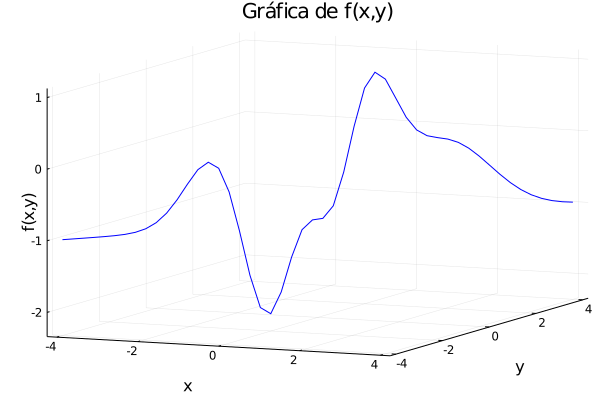

In [90]:
x=collect(range(-4,stop=4,length=50))
y=collect(range(-4,stop=4,length=50))
f=(((2*exp.(-((x.+1).^2))).*(exp.(-((y.+2).^2)))) + (exp.(-((y.-2).^2))) + (((6*x).*(x.^2+y.^2)).*exp.(-((x.^2).+y.^2)) ).-1)
plot(x,y,f,title="Gráfica de f(x,y)",xlabel="x",ylabel="y",zlabel="f(x,y)",lw=1,color="blue",label=false)

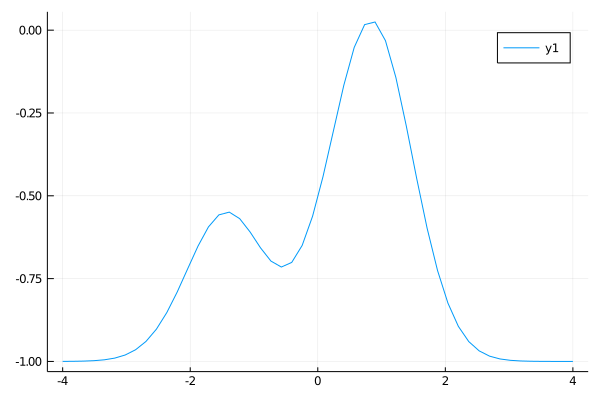

In [399]:
y=-1.37
x=collect(range(-4,stop=4,length=50))
g(x)=(( 2*exp(-((x+1)^2))*(exp(-((y+2)^2)) + exp(-((y-2)^2))) ) + ( (6*x*((x^2)+y^2))*exp(-((x^2)+y^2)) )-1) #funcion
plot(x,g)

Y recordamos el algoritmo del método de bisección visto en clase, el cual se utiliza para encontrar una raíz en un intervalo específico de una función:

In [3]:
function raiz_bf(funcion,intervalo,error=1e-4)
    raiz = 0.5*(intervalo[1]+intervalo[2])
    iteracion = 0
    while abs(intervalo[2]-intervalo[1]) > error
        f_izq , f_med = funcion(intervalo[1]) , funcion(raiz)
        if f_izq*f_med < 0
            intervalo[2] = raiz
        else
            intervalo[1] = raiz
        end
        raiz = 0.5*(intervalo[1]+intervalo[2])
        iteracion += 1
    end
    return raiz,iteracion
end

raiz_bf (generic function with 2 methods)

In [409]:
rango1=collect(range(-2.82,stop=-1.58,step=0.01))
rango2=collect(range(-1.38,stop=-1.35,step=0.01))
rango3=collect(range(-1.34,stop=1.34,step=0.01))
rango4=collect(range(1.58,stop=2.82,step=0.01));

In [410]:
puntos1=[]
for i in rango1
    y=i
    h(x)=(( 2*exp(-((x+1)^2))*(exp(-((y+2)^2)) + exp(-((y-2)^2))) ) + ( (6*x*((x^2)+y^2))*exp(-((x^2)+y^2)) )-1) #funcion
    raiz1,iter=raiz_bf(h,[-2.0,-1.0])
    raiz2,iter=raiz_bf(h,[-1.0,0.0])
    raices1=[raiz1,raiz2]
    for j in 1:2
        push!(puntos1,[i,raices1[j]])
    end
end

In [411]:
puntos2=[]
for i in rango2
    y=i
    h(x)=(( 2*exp(-((x+1)^2))*(exp(-((y+2)^2)) + exp(-((y-2)^2))) ) + ( (6*x*((x^2)+y^2))*exp(-((x^2)+y^2)) )-1) #funcion
    raiz1,iter=raiz_bf(h,[0.0,0.8])
    raiz2,iter=raiz_bf(h,[0.8,1.0])
    raices2=[raiz1,raiz2]
    for j in 1:2
        push!(puntos2,[i,raices2[j]])
    end
end

In [412]:
puntos3=[]
for i in rango3
    y=i
    h(x)=(( 2*exp(-((x+1)^2))*(exp(-((y+2)^2)) + exp(-((y-2)^2))) ) + ( (6*x*((x^2)+y^2))*exp(-((x^2)+y^2)) )-1) #funcion
    raiz1,iter=raiz_bf(h,[0.0,1.0])
    raiz2,iter=raiz_bf(h,[1.0,2.0])
    raices3=[raiz1,raiz2]
    for j in 1:2
        push!(puntos3,[i,raices3[j]])
    end
end

In [413]:
puntos4=[]
for i in rango4
    y=i
    h(x)=(( 2*exp(-((x+1)^2))*(exp(-((y+2)^2)) + exp(-((y-2)^2))) ) + ( (6*x*((x^2)+y^2))*exp(-((x^2)+y^2)) )-1) #funcion
    raiz1,iter=raiz_bf(h,[-2.0,-1.0])
    raiz2,iter=raiz_bf(h,[-1.0,0.0])
    raices4=[raiz1,raiz2]
    for j in 1:2
        push!(puntos4,[i,raices4[j]])
    end
end

In [414]:
puntos5=[]
y=-1.57
h(x)=(( 2*exp(-((x+1)^2))*(exp(-((y+2)^2)) + exp(-((y-2)^2))) ) + ( (6*x*((x^2)+y^2))*exp(-((x^2)+y^2)) )-1) #funcion
raiz1,iter=raiz_bf(h,[-2.0,-1.3])
raiz2,iter=raiz_bf(h,[-1.3,0.0])
raices5=[raiz1,raiz2]
for j in 1:2
    push!(puntos5,[y,raices5[j]])
end

In [415]:
puntos6=[]
y=-1.56
h(x)=(( 2*exp(-((x+1)^2))*(exp(-((y+2)^2)) + exp(-((y-2)^2))) ) + ( (6*x*((x^2)+y^2))*exp(-((x^2)+y^2)) )-1) #funcion
raiz1,iter=raiz_bf(h,[-2.0,-1.2])
raiz2,iter=raiz_bf(h,[-1.2,0.0])
raices6=[raiz1,raiz2]
for j in 1:2
    push!(puntos6,[y,raices6[j]])
end

In [416]:
puntos7=[]
y=1.57
h(x)=(( 2*exp(-((x+1)^2))*(exp(-((y+2)^2)) + exp(-((y-2)^2))) ) + ( (6*x*((x^2)+y^2))*exp(-((x^2)+y^2)) )-1) #funcion
raiz1,iter=raiz_bf(h,[-2.0,-1.3])
raiz2,iter=raiz_bf(h,[-1.3,0.0])
raices7=[raiz1,raiz2]
for j in 1:2
    push!(puntos7,[y,raices7[j]])
end

In [417]:
puntos8=[]
y=1.56
h(x)=(( 2*exp(-((x+1)^2))*(exp(-((y+2)^2)) + exp(-((y-2)^2))) ) + ( (6*x*((x^2)+y^2))*exp(-((x^2)+y^2)) )-1) #funcion
raiz1,iter=raiz_bf(h,[-2.0,-1.2])
raiz2,iter=raiz_bf(h,[-1.2,0.0])
raices8=[raiz1,raiz2]
for j in 1:2
    push!(puntos8,[y,raices8[j]])
end

In [418]:
puntos=vcat(puntos1,puntos2,puntos3,puntos4,puntos5,puntos6,puntos7,puntos8)
xs=zeros(length(puntos))
ys=zeros(length(puntos))
for i in 1:length(puntos)
    xs[i]=puntos[i][1]
end
for i in 1:length(puntos)
    ys[i]=puntos[i][2]
end

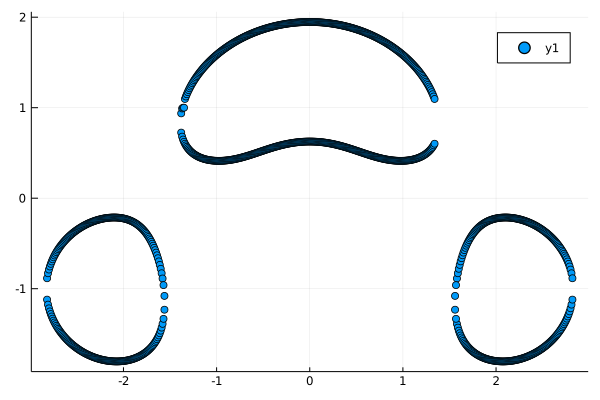

In [421]:
scatter(xs,ys)